In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import tmap as tm
import numpy as np
from matplotlib import pyplot as plt

In [12]:
ethanol = ".".join(["CCOCCCCCCCCCC"] * 10)

mol = Chem.MolFromSmiles(ethanol)
mol = AllChem.AddHs(mol)
edge_list = []
for bond in mol.GetBonds():
    edge_list.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), np.random.rand()])

In [21]:
CFG = tm.LayoutConfiguration()
CFG.node_size = 2
CFG.k = 5
CFG.sl_scaling_type = tm.RelativeToAvgLength

x_mst, y_mst, s_mst, t_mst, _ = tm.layout_from_edge_list(
    mol.GetNumAtoms(), edge_list, create_mst=True, config=CFG
)

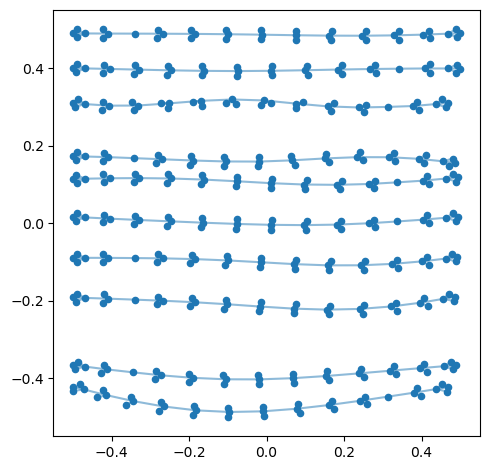

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(s_mst)):
    ax.plot(
        [x_mst[s_mst[i]], x_mst[t_mst[i]]],
        [y_mst[s_mst[i]], y_mst[t_mst[i]]],
        alpha=0.5,
        zorder=1,
        ms=5,
        color="tab:blue"
    )

ax.scatter(x_mst, y_mst, zorder=2, s=20, color="tab:blue")
ax.set_aspect("equal")
plt.tight_layout()
